In [1]:
import warnings
warnings.filterwarnings('ignore')

# 1. Knowledge Graphs - Data Preprocessing

## 1.1. Load Data

In [2]:
import pandas as pd

In [3]:
# import movie plots data from: https://www.kaggle.com/jrobischon/wikipedia-movie-plots/
movie_plots_data = pd.read_csv("wiki_movie_plots_deduped.csv")
print(movie_plots_data.shape)

(34886, 8)


## 1.2. Select Subset

In [4]:
movie_plots_data_selection = movie_plots_data[movie_plots_data['Release Year'] >= 2005]

In [5]:
plots = movie_plots_data_selection.Plot

## 1.3. Split Movie Plots Into Sentences

In [6]:
phrases = []
for plot in plots.head(3000):
    phrases_all = plot.split('.')
    phrases_filtered = [p.strip() for p in phrases_all if p.strip() and len(p.strip()) > 3]
    phrases += phrases_filtered

In [7]:
from textacy.extract import subject_verb_object_triples

In [8]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [9]:
doc = nlp('They are watching a movie')
iterator = subject_verb_object_triples(doc)
for it in iterator:
    print(it)

(They, are watching, movie)


## 1.4. Extract triples: subject-verb-object (SVO)

In [10]:
from tqdm import tqdm

In [11]:
triples_raw = []

for i in tqdm(phrases[0:1000]):  # TODO: remove limited no. phrases
    iterator = subject_verb_object_triples(nlp(i))
    phrase_triples = []
    for svo in iterator:
        phrase_triples.append(svo)
    triples_raw.append(phrase_triples)

100%|██████████| 1000/1000 [00:07<00:00, 125.70it/s]


## 1.5. Lematize + Stem Triples

In [12]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus.reader.wordnet import VERB
lemmatizer = WordNetLemmatizer()

In [13]:
lemmatized_triples = []
lemmatized_stemmed_triples = []

stemmer = SnowballStemmer('english')

In [14]:
from nltk.stem import SnowballStemmer

In [15]:
def lemmatize_stemming(text):
    # lemmatize + stem a text
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [16]:
phrase_counter = 0
detected_counter = 0

for (phrase, phrase_triples) in zip(phrases, triples_raw):
    print('phrase triples:', phrase_triples)
    phrase_counter += 1
    if phrase_triples:
        detected_counter += 1
        for triple in phrase_triples:
            print('raw:', triple)
            # lemmatize 
            s = lemmatizer.lemmatize(str(triple[0]))
            o = lemmatizer.lemmatize(str(triple[2]))
            v = lemmatizer.lemmatize(str(triple[1][-1]), VERB)  # take last token in verb expression
            
            # lemmatize + stem
            lss = lemmatize_stemming(str(triple[0]))
            lso = lemmatize_stemming(str(triple[2]))
            lsv = lemmatize_stemming(str(triple[1][-1]))
            
            print('lemmatized: s:', s, ', o:', o, ', v:', v)
            print('lemmatized+stemmed: s:', lss, ', o:', lso, ', v:', lsv)
            
            lemmatized_triples.append([s.lower(), v.lower(), o.lower()])
            lemmatized_stemmed_triples.append([lss.lower(), lsv.lower(), lso.lower()])
    else:
        print('Could not detect triples in phrase:', phrase)
        lemmatized_triples.append([])
        lemmatized_stemmed_triples.append([])

phrase triples: []
Could not detect triples in phrase: Andy Stitzer is a 40-year-old virgin who lives alone, his apartment filled with his collection of action figures and video games
phrase triples: [(him, lose, virginity)]
raw: (him, lose, virginity)
lemmatized: s: him , o: virginity , v: lose
lemmatized+stemmed: s: him , o: virgin , v: lose
phrase triples: [(men, give, Andy), (men, give, advice)]
raw: (men, give, Andy)
lemmatized: s: men , o: Andy , v: give
lemmatized+stemmed: s: men , o: andi , v: give
raw: (men, give, advice)
lemmatized: s: men , o: advice , v: give
lemmatized+stemmed: s: men , o: advic , v: give
phrase triples: [(Cal, advises, Andy), (Cal, advises, ask), (he, practices, Beth)]
raw: (Cal, advises, Andy)
lemmatized: s: Cal , o: Andy , v: advise
lemmatized+stemmed: s: cal , o: andi , v: advis
raw: (Cal, advises, ask)
lemmatized: s: Cal , o: ask , v: advise
lemmatized+stemmed: s: cal , o: ask , v: advis
raw: (he, practices, Beth)
lemmatized: s: he , o: Beth , v: prac

phrase triples: [(Thaddius, enters, room), (she, dislikes, him)]
raw: (Thaddius, enters, room)
lemmatized: s: Thaddius , o: room , v: enter
lemmatized+stemmed: s: thaddius , o: room , v: enter
raw: (she, dislikes, him)
lemmatized: s: she , o: him , v: dislike
lemmatized+stemmed: s: she , o: him , v: dislik
phrase triples: [(Thaddius, are having, sex), (Rose, are having, sex)]
raw: (Thaddius, are having, sex)
lemmatized: s: Thaddius , o: sex , v: have
lemmatized+stemmed: s: thaddius , o: sex , v: have
raw: (Rose, are having, sex)
lemmatized: s: Rose , o: sex , v: have
lemmatized+stemmed: s: rose , o: sex , v: have
phrase triples: [(Rose, hangs, bedsheet)]
raw: (Rose, hangs, bedsheet)
lemmatized: s: Rose , o: bedsheet , v: hang
lemmatized+stemmed: s: rose , o: bedsheet , v: hang
phrase triples: []
Could not detect triples in phrase: Jack is furious that his daughter has been "ruined," and gives Thaddius one day to move out
phrase triples: []
Could not detect triples in phrase: Meanwhile,

lemmatized: s: father , o: appearing , v: keep
lemmatized+stemmed: s: father , o: appear , v: keep
phrase triples: [(Isabel, impresses, producers), (Isabel, impresses, writers), (Jack, convinces, Isabel)]
raw: (Isabel, impresses, producers)
lemmatized: s: Isabel , o: producer , v: impress
lemmatized+stemmed: s: isabel , o: produc , v: impress
raw: (Isabel, impresses, writers)
lemmatized: s: Isabel , o: writer , v: impress
lemmatized+stemmed: s: isabel , o: writer , v: impress
raw: (Jack, convinces, Isabel)
lemmatized: s: Jack , o: Isabel , v: convince
lemmatized+stemmed: s: jack , o: isabel , v: convinc
phrase triples: []
Could not detect triples in phrase: Also joining the show is legendary actress Iris Smythson as Endora
phrase triples: [(Isabel, happens, to overhear)]
raw: (Isabel, happens, to overhear)
lemmatized: s: Isabel , o: to overhear , v: happen
lemmatized+stemmed: s: isabel , o: to overhear , v: happen
phrase triples: []
Could not detect triples in phrase: They are talking 

lemmatized: s: team , o: Charlie , v: include
lemmatized+stemmed: s: team , o: charli , v: includ
phrase triples: [(they, begin, expedition), (they, decide, to press)]
raw: (they, begin, expedition)
lemmatized: s: they , o: expedition , v: begin
lemmatized+stemmed: s: they , o: expedit , v: begin
raw: (they, decide, to press)
lemmatized: s: they , o: to press , v: decide
lemmatized+stemmed: s: they , o: to press , v: decid
phrase triples: []
Could not detect triples in phrase: After the group finds him safely downriver, Strode is suddenly attacked and dragged away by a large, unknown creature
phrase triples: []
Could not detect triples in phrase: His water scooter explodes and causes a cave-in, forcing them to follow the river and search for a new way out
phrase triples: [(Katheryn, discover, parasite), (Nicolai, discover, parasite)]
raw: (Katheryn, discover, parasite)
lemmatized: s: Katheryn , o: parasite , v: discover
lemmatized+stemmed: s: katheryn , o: parasit , v: discov
raw: (Nic

lemmatized+stemmed: s: she , o: him , v: thank
phrase triples: []
Could not detect triples in phrase: Billy is later sent to prison
phrase triples: [(who, changes, narrative)]
raw: (who, changes, narrative)
lemmatized: s: who , o: narrative , v: change
lemmatized+stemmed: s: who , o: narrat , v: chang
phrase triples: [(they, are shown, kissing)]
raw: (they, are shown, kissing)
lemmatized: s: they , o: kissing , v: show
lemmatized+stemmed: s: they , o: kiss , v: show
phrase triples: []
Could not detect triples in phrase: James J
phrase triples: [(who, is forced, to give)]
raw: (who, is forced, to give)
lemmatized: s: who , o: to give , v: force
lemmatized+stemmed: s: who , o: to giv , v: forc
phrase triples: []
Could not detect triples in phrase: This is both a relief and a burden to his wife, Mae
phrase triples: [(She, cannot bring, herself)]
raw: (She, cannot bring, herself)
lemmatized: s: She , o: herself , v: bring
lemmatized+stemmed: s: she , o: herself , v: bring
phrase triples: [

In [17]:
print('Detection rate: ', (detected_counter / phrase_counter) * 100, '%')

Detection rate:  65.4 %


# 2. Create Graph

### 2.1. Create SOV Pandas DataFrame

In [18]:
# use only sentences with non-empty SOV triples

In [19]:
sources = []
relations = []
targets = []

In [20]:
for ep_item in lemmatized_stemmed_triples:
    # check found items are not empty
    if ep_item:
        print(ep_item)
        # append source/relation/target
        sources.append(ep_item[0])
        relations.append(ep_item[1])
        targets.append(ep_item[2])

['him', 'lose', 'virgin']
['men', 'give', 'andi']
['men', 'give', 'advic']
['cal', 'advis', 'andi']
['cal', 'advis', 'ask']
['he', 'practic', 'beth']
['david', 'give', 'andi']
['david', 'give', 'collect']
['andi', 'begin', 'to soci']
['andi', 'begin', 'form']
['manager paula', 'promot', 'andi']
['manager paula', 'promot', 'to fil']
['jay', 'attempt', 'to quicken']
['andi', 'discov', 'hooker']
['friend', 'stop', 'tri']
['andi', 'land', 'date']
['they', 'postpon', 'have']
['they', 'postpon', 'agre']
['friend', 'begin', 'to encount']
['david', 'take', 'vow']
['sex', 'ruin', 'relationship']
['trish', 'encourag', 'dream']
['they', 'fund', 'it']
['andi', 'take', 'marla']
['him', 'tell', 'trish']
['which', 'upset', 'trish']
['he', 'explain', 'retic']
['andi', 'accus', 'her']
['he', 'meet', 'friend']
['marla', 'convinc', 'trish']
['he', 'attempt', 'to apolog']
['andi', 'tri', 'to defend']
['andi', 'tri', 'declar']
['they', 'consumm', 'marriag']
['father', 'call', 'him']
['father', 'call', 'to 

In [21]:
# create DataFrame
kg_df = pd.DataFrame({'source': sources, 'target': targets, 'edge': relations})

In [22]:
kg_df.tail()

,source,target,edge
1052,harold,jimmi,free
1053,tanner,jimmi,free
1054,other,jimmi,free
1055,who,them,tell
1056,harold,danc,perform


### 2.2. Top Subjects (Sources)

<AxesSubplot:>

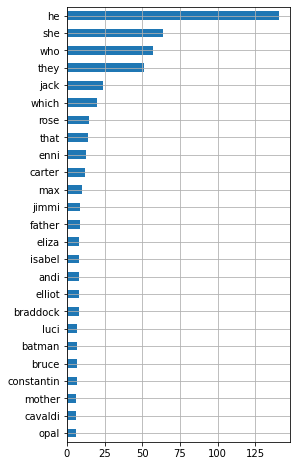

In [23]:
kg_df.source.value_counts()[:25].sort_values().plot.barh(figsize=(4,8), grid=True)

### 2.3. Top Objects (Targets)

<AxesSubplot:>

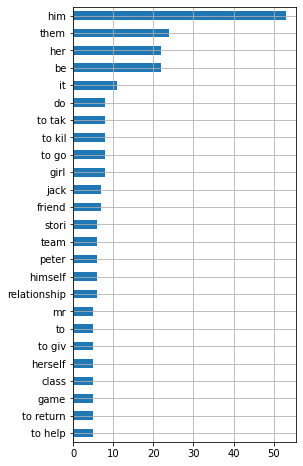

In [24]:
kg_df.target.value_counts()[:25].sort_values().plot.barh(figsize=(4,8), grid=True)

### 2.4. Top verbs (Edge/Relations)

<AxesSubplot:>

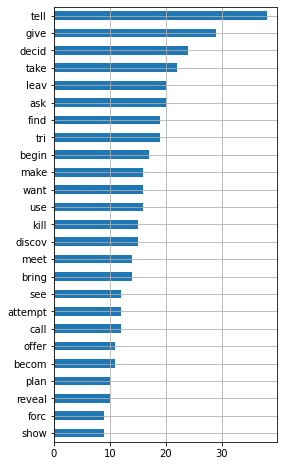

In [25]:
kg_df.edge.value_counts()[:25].sort_values().plot.barh(figsize=(4,8), grid=True)

### 2.5. Create NetworkX Graph

In [26]:
import networkx as nx

In [27]:
# create a directed graph from a Pandas dataframe

In [28]:
G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

### 2.6. Find Links

In [29]:
edge_attrs = [v['edge'] for k, v in G.get_edge_data('he', 'her').items()]

In [30]:
print(set(edge_attrs))

{'bring', 'ask'}


In [31]:
d = {x:edge_attrs.count(x) for x in set(edge_attrs)}

In [32]:
print(sorted(d.items(), key=lambda item: item[1], reverse=True))

[('ask', 2), ('bring', 1)]


### 2.7. Depth First Search via NetworkX

In [33]:
selected_nodes = [n for (n, v, e) in G.edges(data=True) if (e['edge'] in ['tell', 'ask'])]

In [34]:
SG = G.subgraph(selected_nodes)

In [35]:
nx_SG = nx.dfs_tree(SG, source='she', depth_limit=1)

In [36]:
print(len(list(nx_SG.edges())))

3


### 2.8. Visualization

In [37]:
from matplotlib import pylab as plt

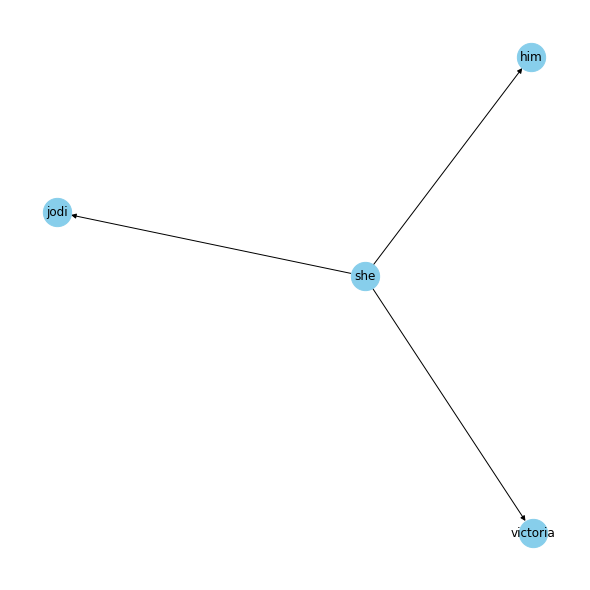

In [38]:
plt.figure(figsize=(8,8))
pos = nx.spring_layout(nx_SG, k=0.5)  # k regulates the distance between nodes
nx.draw(nx_SG, with_labels=True, node_color='skyblue', node_size=800, edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

In [39]:
nx_SG = nx.dfs_tree(SG, source='she', depth_limit=2)
print(len(list(nx_SG.edges())))

3


In [40]:
plt.figure(figsize=(8,8))
pos = nx.spring_layout(nx_SG, k=0.5)  

<Figure size 576x576 with 0 Axes>

# 3. Topic Modelling

In [92]:
import pyLDAvis.gensim
import gensim
from gensim import corpora, models

In [93]:
stemmer = SnowballStemmer('english')

In [94]:
def lemmatize_stemming(text):
    # lemmatize + stem a text
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [95]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        # remove stopword tokens and tokens of length smaller than 3
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            # lemmatize + stem tokens
            result.append(lemmatize_stemming(token))
    return result

In [96]:
processed_docs = plots.map(preprocess)
processed_docs.head()

14591    [andi, stitzer, year, old, virgin, live, apart...
14592    [birch, street, person, account, famili, life,...
14593    [max, lone, child, suburb, austin, creat, imag...
14594    [dead, pathogen, virus, kill, earth, popul, fo...
14595    [ronald, defeo, murder, famili, hous, ocean, a...
Name: Plot, dtype: object

In [97]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [98]:
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

In [99]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [100]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [101]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=4, id2word=dictionary, passes=2, workers=8)

In [102]:
lda_tfidf_display = pyLDAvis.gensim.prepare(lda_model_tfidf, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_tfidf_display)

In [103]:
def show_model_topics(model, words_per_topic=10):
    # Description:
    #   Show topics + most meaningful words & probability
    # Params:
    #   model: LDA model object
    #   words_per_topic: Number of words to be presented for each topic. 
    #                    These will be the most relevant words (assigned the highest probability for each topic).
    for idx, topic in model.show_topics(num_words=words_per_topic, formatted=False):
        print('Topic {} | Words & Probability: {}'.format(idx+1, topic))

In [104]:
show_model_topics(lda_model_tfidf, words_per_topic=5)

Topic 1 | Words & Probability: [('film', 0.0015557433), ('love', 0.001487301), ('stori', 0.0013819514), ('villag', 0.0013627034), ('famili', 0.001335115)]
Topic 2 | Words & Probability: [('stori', 0.0016368993), ('love', 0.0016167373), ('film', 0.0015247839), ('villag', 0.0015172309), ('kill', 0.0015027391)]
Topic 3 | Words & Probability: [('famili', 0.0015606296), ('kill', 0.0015454002), ('villag', 0.0014772306), ('father', 0.0014668269), ('love', 0.0014475782)]
Topic 4 | Words & Probability: [('film', 0.0015680382), ('father', 0.0014896927), ('kill', 0.0014874435), ('famili', 0.0014784845), ('stori', 0.0014779918)]


In [107]:
txt = dictionary.doc2bow(preprocess(plots[plots.index[23]]))
# Classifying sample document using LDA "Bag-of-Words" model
for index, score in sorted(lda_model_tfidf[txt], reverse=True):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.012418355792760849	 
Topic: 0.002*"film" + 0.001*"father" + 0.001*"kill" + 0.001*"famili" + 0.001*"stori" + 0.001*"love" + 0.001*"villag" + 0.001*"son" + 0.001*"mother" + 0.001*"friend"

Score: 0.6312890648841858	 
Topic: 0.002*"famili" + 0.002*"kill" + 0.001*"villag" + 0.001*"father" + 0.001*"love" + 0.001*"film" + 0.001*"girl" + 0.001*"friend" + 0.001*"life" + 0.001*"stori"

Score: 0.3534604609012604	 
Topic: 0.002*"stori" + 0.002*"love" + 0.002*"film" + 0.002*"villag" + 0.002*"kill" + 0.001*"father" + 0.001*"girl" + 0.001*"famili" + 0.001*"life" + 0.001*"polic"


In [108]:
def select_plots(plots, topic_id=0):
    res = []
    for plot in plots:
        txt = dictionary.doc2bow(preprocess(plot))
        topic_scores = lda_model_tfidf[txt]
        topic_scores_sorted = sorted(topic_scores, key=lambda item: item[1], reverse=True)
        if (topic_scores_sorted[0][0] == topic_id) and (topic_scores_sorted[0][1] > 0.5):
            res.append(plot)
    return res

In [109]:
plots_topic1 = select_plots(plots, topic_id=1)

In [110]:
print(len(plots_topic1))

1884


# 4. Topic Modelling + Knowledge Graph

In [112]:
phrases = []
for plot in plots_topic1[0:150]:
    phrases_all = plot.split('.')
    phrases_filtered = [p.strip() for p in phrases_all if p.strip() and len(p.strip()) > 3]
    phrases += phrases_filtered

In [113]:
# extract triples
triples_raw = []

for i in tqdm(phrases):
    iterator = subject_verb_object_triples(nlp(i))
    phrase_triples = []
    for svo in iterator:
        phrase_triples.append(svo)
    triples_raw.append(phrase_triples)

100%|██████████| 3890/3890 [00:28<00:00, 135.08it/s]


In [114]:
phrase_counter = 0
detected_counter = 0

In [115]:
for (phrase, phrase_triples) in zip(phrases, triples_raw):
    print('phrase triples:', phrase_triples)
    phrase_counter += 1
    if phrase_triples:
        detected_counter += 1
        for triple in phrase_triples:
            print('raw:', triple)
            # lemmatize 
            s = lemmatizer.lemmatize(str(triple[0]))
            o = lemmatizer.lemmatize(str(triple[2]))
            v = lemmatizer.lemmatize(str(triple[1][-1]), VERB)  # take last token in verb expression
            
            # lemmatize + stem
            lss = lemmatize_stemming(str(triple[0]))
            lso = lemmatize_stemming(str(triple[2]))
            lsv = lemmatize_stemming(str(triple[1][-1]))
            
            print('lemmatized: s:', s, ', o:', o, ', v:', v)
            print('lemmatized+stemmed: s:', lss, ', o:', lso, ', v:', lsv)
            
            lemmatized_triples.append([s.lower(), v.lower(), o.lower()])
            lemmatized_stemmed_triples.append([lss.lower(), lsv.lower(), lso.lower()])
    else:
        print('Could not detect triples in phrase:', phrase)
        lemmatized_triples.append([])
        lemmatized_stemmed_triples.append([])

phrase triples: [(virus, has killed, %)]
raw: (virus, has killed, %)
lemmatized: s: virus , o: % , v: kill
lemmatized+stemmed: s: virus , o: % , v: kill
phrase triples: []
Could not detect triples in phrase: 404 years later, in late 2415, all of the survivors inhabit Bregna, a walled futuristic city-state, which is ruled by a congress of scientists
phrase triples: []
Could not detect triples in phrase: Although Bregna is largely an idyllic place in the destroyed Earth, people routinely disappear and the population has nightmares
phrase triples: []
Could not detect triples in phrase: A skilled warrior, named Æon Flux, is a member of the Monicans, an underground rebel organization who communicate through telepathy-enabling technology and are led by the Handler
phrase triples: []
Could not detect triples in phrase: After a mission to destroy a surveillance station, Æon comes home to find her sister Una has been mistaken for a Monican and killed
phrase triples: []
Could not detect triples 

phrase triples: [(they, decide, to consummate), (they, decide, wind)]
raw: (they, decide, to consummate)
lemmatized: s: they , o: to consummate , v: decide
lemmatized+stemmed: s: they , o: to consumm , v: decid
raw: (they, decide, wind)
lemmatized: s: they , o: wind , v: decide
lemmatized+stemmed: s: they , o: wind , v: decid
phrase triples: []
Could not detect triples in phrase: An armed man—later identified as Philippe LaRoche—bursts into the hotel room, beats Charles, and brutally rapes Lucinda
phrase triples: [(Charles, not wanting, spouses), (Lucinda, not wanting, spouses)]
raw: (Charles, not wanting, spouses)
lemmatized: s: Charles , o: spouse , v: want
lemmatized+stemmed: s: charl , o: spous , v: want
raw: (Lucinda, not wanting, spouses)
lemmatized: s: Lucinda , o: spouse , v: want
lemmatized+stemmed: s: lucinda , o: spous , v: want
phrase triples: [(contacts Charles, threatens, to kill)]
raw: (contacts Charles, threatens, to kill)
lemmatized: s: contacts Charles , o: to kill , 

lemmatized: s: maze , o: him , v: attack
lemmatized+stemmed: s: maze , o: him , v: attack
raw: (which, turns, be)
lemmatized: s: which , o: be , v: turn
lemmatized+stemmed: s: which , o: be , v: turn
raw: (which, turns, transports)
lemmatized: s: which , o: transport , v: turn
lemmatized+stemmed: s: which , o: transport , v: turn
phrase triples: [(Pettigrew, kills, Cedric), (that, rejuvenates, Voldemort), (who, summons, Death Eaters)]
raw: (Pettigrew, kills, Cedric)
lemmatized: s: Pettigrew , o: Cedric , v: kill
lemmatized+stemmed: s: pettigrew , o: cedric , v: kill
raw: (that, rejuvenates, Voldemort)
lemmatized: s: that , o: Voldemort , v: rejuvenate
lemmatized+stemmed: s: that , o: voldemort , v: rejuven
raw: (who, summons, Death Eaters)
lemmatized: s: who , o: Death Eaters , v: summon
lemmatized+stemmed: s: who , o: death eat , v: summon
phrase triples: [(Voldemort, releases, Harry)]
raw: (Voldemort, releases, Harry)
lemmatized: s: Voldemort , o: Harry , v: release
lemmatized+stemme

lemmatized+stemmed: s: king julien , o: concern , v: ignor
raw: (lemurs, fend, fossa)
lemmatized: s: lemur , o: fossa , v: fend
lemmatized+stemmed: s: lemur , o: fossa , v: fend
raw: (who, hunt, lemurs)
lemmatized: s: who , o: lemur , v: hunt
lemmatized+stemmed: s: who , o: lemur , v: hunt
phrase triples: [(Alex, scares, fossa), (he, attacks, Marty)]
raw: (Alex, scares, fossa)
lemmatized: s: Alex , o: fossa , v: scar
lemmatized+stemmed: s: alex , o: fossa , v: scar
raw: (he, attacks, Marty)
lemmatized: s: he , o: Marty , v: attack
lemmatized+stemmed: s: he , o: marti , v: attack
phrase triples: [(King Julien, banishes, him)]
raw: (King Julien, banishes, him)
lemmatized: s: King Julien , o: him , v: banish
lemmatized+stemmed: s: king julien , o: him , v: banish
phrase triples: [(Marty, begins, to regret)]
raw: (Marty, begins, to regret)
lemmatized: s: Marty , o: to regret , v: begin
lemmatized+stemmed: s: marti , o: to regret , v: begin
phrase triples: []
Could not detect triples in phr

lemmatized: s: Dave , o: counselor , v: confront
lemmatized+stemmed: s: dave , o: counselor , v: confront
phrase triples: [(family, holds, funeral), (Dave, asks, Noreen), (Dave, asks, reconcile), (Dave, asks, move), (she, has decided, to marry)]
raw: (family, holds, funeral)
lemmatized: s: family , o: funeral , v: hold
lemmatized+stemmed: s: famili , o: funer , v: hold
raw: (Dave, asks, Noreen)
lemmatized: s: Dave , o: Noreen , v: ask
lemmatized+stemmed: s: dave , o: noreen , v: ask
raw: (Dave, asks, reconcile)
lemmatized: s: Dave , o: reconcile , v: ask
lemmatized+stemmed: s: dave , o: reconcil , v: ask
raw: (Dave, asks, move)
lemmatized: s: Dave , o: move , v: ask
lemmatized+stemmed: s: dave , o: move , v: ask
raw: (she, has decided, to marry)
lemmatized: s: she , o: to marry , v: decide
lemmatized+stemmed: s: she , o: to marri , v: decid
phrase triples: []
Could not detect triples in phrase: Dave and Robert have one final talk, in which Dave breaks down in tears, unsure of his life'

lemmatized+stemmed: s: parent , o: have , v: invit
phrase triples: [(They, tell, her)]
raw: (They, tell, her)
lemmatized: s: They , o: her , v: tell
lemmatized+stemmed: s: they , o: her , v: tell
phrase triples: [(José, takes, Nina), (she, tells, him), (she, tells, death), (house, caused, pain)]
raw: (José, takes, Nina)
lemmatized: s: José , o: Nina , v: take
lemmatized+stemmed: s: josé , o: nina , v: take
raw: (she, tells, him)
lemmatized: s: she , o: him , v: tell
lemmatized+stemmed: s: she , o: him , v: tell
raw: (she, tells, death)
lemmatized: s: she , o: death , v: tell
lemmatized+stemmed: s: she , o: death , v: tell
raw: (house, caused, pain)
lemmatized: s: house , o: pain , v: cause
lemmatized+stemmed: s: hous , o: pain , v: caus
phrase triples: [(she, tells, José), (she, would meet, man), (who, loves, her)]
raw: (she, tells, José)
lemmatized: s: she , o: José , v: tell
lemmatized+stemmed: s: she , o: josé , v: tell
raw: (she, would meet, man)
lemmatized: s: she , o: man , v: me

lemmatized+stemmed: s: tree , o: immort , v: offer
phrase triples: [(she, does not expect, to see), (Izzi, asks, Tom), (Izzi, asks, to finish)]
raw: (she, does not expect, to see)
lemmatized: s: she , o: to see , v: expect
lemmatized+stemmed: s: she , o: to se , v: expect
raw: (Izzi, asks, Tom)
lemmatized: s: Izzi , o: Tom , v: ask
lemmatized+stemmed: s: izzi , o: tom , v: ask
raw: (Izzi, asks, to finish)
lemmatized: s: Izzi , o: to finish , v: ask
lemmatized+stemmed: s: izzi , o: to finish , v: ask
phrase triples: [(star, goes, supernova)]
raw: (star, goes, supernova)
lemmatized: s: star , o: supernova , v: go
lemmatized+stemmed: s: star , o: supernova , v: go
phrase triples: []
Could not detect triples in phrase: In the 26th century, future space traveler Tommy travels there for the event, in a spaceship made of an enclosed biosphere containing the Tree of Life he seeded above her grave
phrase triples: []
Could not detect triples in phrase: The three story lines are told nonlinearly,

Could not detect triples in phrase: As Rose drives away in a taxi, she is being watched by one of Trumpy's henchmen
phrase triples: [(Rooster, begins, have)]
raw: (Rooster, begins, have)
lemmatized: s: Rooster , o: have , v: begin
lemmatized+stemmed: s: rooster , o: have , v: begin
phrase triples: [(Percival, calms, her), (he, wrote, for)]
raw: (Percival, calms, her)
lemmatized: s: Percival , o: her , v: calm
lemmatized+stemmed: s: perciv , o: her , v: calm
raw: (he, wrote, for)
lemmatized: s: he , o: for , v: write
lemmatized+stemmed: s: he , o: for , v: write
phrase triples: [(Angel, becomes, star)]
raw: (Angel, becomes, star)
lemmatized: s: Angel , o: star , v: become
lemmatized+stemmed: s: angel , o: star , v: becom
phrase triples: []
Could not detect triples in phrase: During a storm, Angel runs over to the morgue to be with Percival, and the two have sex
phrase triples: []
Could not detect triples in phrase: Roosters's wife Zora gets tired of his cheating and moves with their chi

lemmatized+stemmed: s: boss , o: to repay , v: order
raw: (Boss, orders, kill)
lemmatized: s: Boss , o: kill , v: order
lemmatized+stemmed: s: boss , o: kill , v: order
phrase triples: []
Could not detect triples in phrase: Slevin then returns to the apartment, but is kidnapped again by two Jewish henchmen working for The Rabbi
phrase triples: [(Rabbi, mistakes, Slevin), (he, repay, gambling debt)]
raw: (Rabbi, mistakes, Slevin)
lemmatized: s: Rabbi , o: Slevin , v: mistake
lemmatized+stemmed: s: rabbi , o: slevin , v: mistak
raw: (he, repay, gambling debt)
lemmatized: s: he , o: gambling debt , v: repay
lemmatized+stemmed: s: he , o: gambling debt , v: repay
phrase triples: []
Could not detect triples in phrase: Slevin returns to The Boss and agrees to kill The Fairy
phrase triples: [(Slevin, visiting, mob bosses), (he, plans, to kill)]
raw: (Slevin, visiting, mob bosses)
lemmatized: s: Slevin , o: mob bosses , v: visit
lemmatized+stemmed: s: slevin , o: mob boss , v: visit
raw: (he, 

lemmatized+stemmed: s: kraken , o: pearl , v: drag
phrase triples: [(Jones, opens, chest), (Jones, opens, to discover)]
raw: (Jones, opens, chest)
lemmatized: s: Jones , o: chest , v: open
lemmatized+stemmed: s: jone , o: chest , v: open
raw: (Jones, opens, to discover)
lemmatized: s: Jones , o: to discover , v: open
lemmatized+stemmed: s: jone , o: to discov , v: open
phrase triples: [(Norrington, gives, Beckett), (Norrington, gives, heart), (Norrington, gives, Letters), (Beckett, to gain, control)]
raw: (Norrington, gives, Beckett)
lemmatized: s: Norrington , o: Beckett , v: give
lemmatized+stemmed: s: norrington , o: beckett , v: give
raw: (Norrington, gives, heart)
lemmatized: s: Norrington , o: heart , v: give
lemmatized+stemmed: s: norrington , o: heart , v: give
raw: (Norrington, gives, Letters)
lemmatized: s: Norrington , o: Letters , v: give
lemmatized+stemmed: s: norrington , o: letter , v: give
raw: (Beckett, to gain, control)
lemmatized: s: Beckett , o: control , v: gain
le

lemmatized: s: they , o: drink , v: serve
lemmatized+stemmed: s: they , o: drink , v: serv
phrase triples: []
Could not detect triples in phrase: The next morning, they awaken on the deserted beach, robbed of their luggage, money, and documents
phrase triples: [(they, encounter, conflict)]
raw: (they, encounter, conflict)
lemmatized: s: they , o: conflict , v: encounter
lemmatized+stemmed: s: they , o: conflict , v: encount
phrase triples: [(who, speaks, English)]
raw: (who, speaks, English)
lemmatized: s: who , o: English , v: speak
lemmatized+stemmed: s: who , o: english , v: speak
phrase triples: [(he, sustains, head injury)]
raw: (he, sustains, head injury)
lemmatized: s: he , o: head injury , v: sustain
lemmatized+stemmed: s: he , o: head injuri , v: sustain
phrase triples: [(they, find, food), (they, find, clothes), (they, find, number)]
raw: (they, find, food)
lemmatized: s: they , o: food , v: find
lemmatized+stemmed: s: they , o: food , v: find
raw: (they, find, clothes)
lemma

lemmatized: s: Seela , o: get , v: try
lemmatized+stemmed: s: seela , o: get , v: tri
raw: (mother, try, get)
lemmatized: s: mother , o: get , v: try
lemmatized+stemmed: s: mother , o: get , v: tri
phrase triples: [(bear cubs, is learning, to hunt)]
raw: (bear cubs, is learning, to hunt)
lemmatized: s: bear cubs , o: to hunt , v: learn
lemmatized+stemmed: s: bear cub , o: to hunt , v: learn
phrase triples: [(mother, teaches, them), (mother, teaches, to hunt), (she, can smell, seal)]
raw: (mother, teaches, them)
lemmatized: s: mother , o: them , v: teach
lemmatized+stemmed: s: mother , o: them , v: teach
raw: (mother, teaches, to hunt)
lemmatized: s: mother , o: to hunt , v: teach
lemmatized+stemmed: s: mother , o: to hunt , v: teach
raw: (she, can smell, seal)
lemmatized: s: she , o: seal , v: smell
lemmatized+stemmed: s: she , o: seal , v: smell
phrase triples: [(mother, gets, seal), (cubs, can eat, meat), (fox, can eat, meat)]
raw: (mother, gets, seal)
lemmatized: s: mother , o: seal

lemmatized: s: he , o: Nick , v: turn
lemmatized+stemmed: s: he , o: nick , v: turn
phrase triples: [(Nick, pulls, one)]
raw: (Nick, pulls, one)
lemmatized: s: Nick , o: one , v: pull
lemmatized+stemmed: s: nick , o: one , v: pull
phrase triples: []
Could not detect triples in phrase: With his family now avenged, Nick returns home, watches his own family's movies and awaits his inevitable arrest
phrase triples: []
Could not detect triples in phrase: Detective Wallis comes to arrest Nick, but informs him that Lucas has moved and will now live
phrase triples: []
Could not detect triples in phrase: Nick becomes relieved and looks at the television, which shows the family singing on the couch
phrase triples: []
Could not detect triples in phrase: Nick's final fate remains unknown
phrase triples: []
Could not detect triples in phrase: In the extended version of the film, Nick succumbs to his injuries
phrase triples: []
Could not detect triples in phrase: Groomed by her overly ambitious moth

lemmatized: s: Michael , o: head , v: appear
lemmatized+stemmed: s: michael , o: head , v: appear
raw: (Michael, appears, Mason)
lemmatized: s: Michael , o: Mason , v: appear
lemmatized+stemmed: s: michael , o: mason , v: appear
raw: (Michael, appears, Cynthia)
lemmatized: s: Michael , o: Cynthia , v: appear
lemmatized+stemmed: s: michael , o: cynthia , v: appear
raw: (he, murders, parents)
lemmatized: s: he , o: parent , v: murder
lemmatized+stemmed: s: he , o: parent , v: murder
phrase triples: []
Could not detect triples in phrase: Loomis, having been alerted of Michael's escape, comes to Haddonfield looking for Michael
phrase triples: [(Loomis, attempts, to warn)]
raw: (Loomis, attempts, to warn)
lemmatized: s: Loomis , o: to warn , v: attempt
lemmatized+stemmed: s: loomi , o: to warn , v: attempt
phrase triples: []
Could not detect triples in phrase: Loomis and Brackett head to the Strode home, with Brackett explaining along the way that Laurie is really Michael's sister, having b

raw: (Lars, begins, to introduce)
lemmatized: s: Lars , o: to introduce , v: begin
lemmatized+stemmed: s: lar , o: to introduc , v: begin
phrase triples: [(everyone, treats, Bianca)]
raw: (everyone, treats, Bianca)
lemmatized: s: everyone , o: Bianca , v: treat
lemmatized+stemmed: s: everyon , o: bianca , v: treat
phrase triples: [(himself, interacting, more)]
raw: (himself, interacting, more)
lemmatized: s: himself , o: more , v: interact
lemmatized+stemmed: s: himself , o: more , v: interact
phrase triples: [(Margo, has begun, to date), (which, bothers, Lars)]
raw: (Margo, has begun, to date)
lemmatized: s: Margo , o: to date , v: begin
lemmatized+stemmed: s: margo , o: to dat , v: begin
raw: (which, bothers, Lars)
lemmatized: s: which , o: Lars , v: bother
lemmatized+stemmed: s: which , o: lar , v: bother
phrase triples: [(Lars, asks, brother), (he, had become, man)]
raw: (Lars, asks, brother)
lemmatized: s: Lars , o: brother , v: ask
lemmatized+stemmed: s: lar , o: brother , v: ask

lemmatized: s: All , o: friend , v: remain
lemmatized+stemmed: s: all , o: friend , v: remain
phrase triples: [(We, were going, to use)]
raw: (We, were going, to use)
lemmatized: s: We , o: to use , v: go
lemmatized+stemmed: s: we , o: to us , v: go
phrase triples: [(They, fooled, all)]
raw: (They, fooled, all)
lemmatized: s: They , o: all , v: fool
lemmatized+stemmed: s: they , o: all , v: fool
phrase triples: [(Pop, asks, Tom), (he, would like, do)]
raw: (Pop, asks, Tom)
lemmatized: s: Pop , o: Tom , v: ask
lemmatized+stemmed: s: pop , o: tom , v: ask
raw: (he, would like, do)
lemmatized: s: he , o: do , v: like
lemmatized+stemmed: s: he , o: do , v: like
phrase triples: [(Milles, tells, Eddie), (he, started, acting)]
raw: (Milles, tells, Eddie)
lemmatized: s: Milles , o: Eddie , v: tell
lemmatized+stemmed: s: mill , o: eddi , v: tell
raw: (he, started, acting)
lemmatized: s: he , o: acting , v: start
lemmatized+stemmed: s: he , o: act , v: start
phrase triples: []
Could not detect t

lemmatized+stemmed: s: woman , o: coloni , v: discov
raw: (they, are forced, to flee)
lemmatized: s: they , o: to flee , v: force
lemmatized+stemmed: s: they , o: to fle , v: forc
phrase triples: []
Could not detect triples in phrase: He ends up in the sewers of Paris and eventually finds himself at a skylight overlooking the kitchen of Gusteau's restaurant
phrase triples: []
Could not detect triples in phrase: As Remy watches through the window, a young man named Alfredo Linguini is hired as a garbage boy by Skinner, the restaurant's current owner and Gusteau's former sous-chef
phrase triples: [(Linguini, spills, pot), (he, is ruining, it)]
raw: (Linguini, spills, pot)
lemmatized: s: Linguini , o: pot , v: spill
lemmatized+stemmed: s: linguini , o: pot , v: spill
raw: (he, is ruining, it)
lemmatized: s: he , o: it , v: ruin
lemmatized+stemmed: s: he , o: it , v: ruin
phrase triples: [(Linguini, catches, Remy)]
raw: (Linguini, catches, Remy)
lemmatized: s: Linguini , o: Remy , v: catch

lemmatized: s: who , o: to take , v: promise
lemmatized+stemmed: s: who , o: to tak , v: promis
phrase triples: [(they, exhibit, behavior)]
raw: (they, exhibit, behavior)
lemmatized: s: they , o: behavior , v: exhibit
lemmatized+stemmed: s: they , o: behavior , v: exhibit
phrase triples: [(three, develop, friendship)]
raw: (three, develop, friendship)
lemmatized: s: three , o: friendship , v: develop
lemmatized+stemmed: s: three , o: friendship , v: develop
phrase triples: []
Could not detect triples in phrase: When Seth and Evan arrive at the party, they quickly discover that Francis is not welcome there
phrase triples: [(Seth, fills, bottles)]
raw: (Seth, fills, bottles)
lemmatized: s: Seth , o: bottle , v: fill
lemmatized+stemmed: s: seth , o: bottl , v: fill
phrase triples: [(Mark, confronts, him)]
raw: (Mark, confronts, him)
lemmatized: s: Mark , o: him , v: confront
lemmatized+stemmed: s: mark , o: him , v: confront
phrase triples: [(Mark, questions, Seth), (he, is holding, bottl

lemmatized+stemmed: s: he , o: her , v: appreci
phrase triples: [(Kevin, said, thing)]
raw: (Kevin, said, thing)
lemmatized: s: Kevin , o: thing , v: say
lemmatized+stemmed: s: kevin , o: thing , v: say
phrase triples: [(she, loves, him)]
raw: (she, loves, him)
lemmatized: s: she , o: him , v: love
lemmatized+stemmed: s: she , o: him , v: love
phrase triples: []
Could not detect triples in phrase: She announces in front of a crowd at a wedding he is covering that she is in love with him
phrase triples: []
Could not detect triples in phrase: One year later Jane and Kevin are getting married
phrase triples: []
Could not detect triples in phrase: George and Tess meet again and a hope for a second chance shows
phrase triples: []
Could not detect triples in phrase: All 27 brides whom Jane helped, as well as Tess and Casey, are her bridesmaids, wearing the dresses she once wore as their bridesmaid
phrase triples: []
Could not detect triples in phrase: Tom and Joshua Sterling are brothers who

lemmatized: s: he , o: chase , v: give
lemmatized+stemmed: s: he , o: chase , v: give
raw: (he, gives, to)
lemmatized: s: he , o: to , v: give
lemmatized+stemmed: s: he , o: to , v: give
phrase triples: []
Could not detect triples in phrase: Horton finds out the speck harbors the city of Whoville and its inhabitants, the Whos, led by Mayor Ned McDodd
phrase triples: []
Could not detect triples in phrase: He has a wife, Sally, 96 daughters (whose names all begin with the letter H), and one teenage son named JoJo
phrase triples: [(JoJo, doesn't want, be)]
raw: (JoJo, doesn't want, be)
lemmatized: s: JoJo , o: be , v: want
lemmatized+stemmed: s: jojo , o: be , v: want
phrase triples: [(Horton, begins, carrying), (city, starts, experiencing), (Mayor, finds, attempts)]
raw: (Horton, begins, carrying)
lemmatized: s: Horton , o: carrying , v: begin
lemmatized+stemmed: s: horton , o: carri , v: begin
raw: (city, starts, experiencing)
lemmatized: s: city , o: experiencing , v: start
lemmatized+

lemmatized: s: Captain , o: to save , v: decide
lemmatized+stemmed: s: captain , o: to sav , v: decid
phrase triples: []
Could not detect triples in phrase: The ball, thrown in the ocean by Number 2, is retrieved
phrase triples: []
Could not detect triples in phrase: Dave powers down while Dooley and his partner catch up and point their guns at him
phrase triples: []
Could not detect triples in phrase: With no power, Dave's shields are disabled, leaving the crew defenseless
phrase triples: [(Josh, tries, to tell)]
raw: (Josh, tries, to tell)
lemmatized: s: Josh , o: to tell , v: try
lemmatized+stemmed: s: josh , o: to tel , v: tri
phrase triples: [(He, grabs, taser)]
raw: (He, grabs, taser)
lemmatized: s: He , o: taser , v: grab
lemmatized+stemmed: s: he , o: taser , v: grab
phrase triples: [(captain, reveal, themselves), (Number, reveal, themselves)]
raw: (captain, reveal, themselves)
lemmatized: s: captain , o: themselves , v: reveal
lemmatized+stemmed: s: captain , o: themselv , v: 

In [116]:
sources = []
relations = []
targets = []

In [117]:
for ep_item in lemmatized_stemmed_triples:
    # check found items are not empty
    if ep_item:
        print(ep_item)
        # append source/relation/target
        sources.append(ep_item[0])
        relations.append(ep_item[1])
        targets.append(ep_item[2])

['him', 'lose', 'virgin']
['men', 'give', 'andi']
['men', 'give', 'advic']
['cal', 'advis', 'andi']
['cal', 'advis', 'ask']
['he', 'practic', 'beth']
['david', 'give', 'andi']
['david', 'give', 'collect']
['andi', 'begin', 'to soci']
['andi', 'begin', 'form']
['manager paula', 'promot', 'andi']
['manager paula', 'promot', 'to fil']
['jay', 'attempt', 'to quicken']
['andi', 'discov', 'hooker']
['friend', 'stop', 'tri']
['andi', 'land', 'date']
['they', 'postpon', 'have']
['they', 'postpon', 'agre']
['friend', 'begin', 'to encount']
['david', 'take', 'vow']
['sex', 'ruin', 'relationship']
['trish', 'encourag', 'dream']
['they', 'fund', 'it']
['andi', 'take', 'marla']
['him', 'tell', 'trish']
['which', 'upset', 'trish']
['he', 'explain', 'retic']
['andi', 'accus', 'her']
['he', 'meet', 'friend']
['marla', 'convinc', 'trish']
['he', 'attempt', 'to apolog']
['andi', 'tri', 'to defend']
['andi', 'tri', 'declar']
['they', 'consumm', 'marriag']
['father', 'call', 'him']
['father', 'call', 'to 

['cub', 'defeat', 'yanke']
['yanke', 'decid', 'name']
['yanke', 'decid', 'to return']
['yanke', 'decid', 'clear']
['they', 'becom', 'friend']
['scene', 'involv', 'yanke']
['scene', 'involv', 'meet']
['who', 'help', 'him']
['him', 'round', 'base']
['this', 'restor', 'moral']
['who', 'score', 'run']
['cross', 'tri', 'to talk']
['stanley', 'clear', 'custodian']
['he', 'scar', 'them']
['they', 'dump', 'him']
['they', 'hire', 'expert']
['men', 'continu', 'to liv']
['he', 'fit', 'ani']
['paula', 'thwart', 'attempt']
['themselv', 'sail', 'water']
['themselv', 'sail', 'confid']
['vocat', 'exasper', 'roommat']
['paula', 'take', 'job']
['she', 'wind', 'fall']
['ace', 'wind', 'fall']
['ace', 'out', 'paula']
['tripp', 'confront', 'parent']
['paula', 'refund', 'al']
['tripp', 'manag', 'to forg']
['he', 'forgiv', 'paula']
['parent', 'devis', 'plan']
['friend', 'devis', 'plan']
['paula', 'pour', 'heart']
['he', 'forgiv', 'her']
['who', 'help', 'develop']
['research', 'discov', 'presenc']
['tour', 'sh

['boss', 'order', 'kill']
['rabbi', 'mistak', 'slevin']
['he', 'repay', 'gambling debt']
['slevin', 'visit', 'mob boss']
['he', 'plan', 'to kil']
['slevin', 'arrang', 'date']
['who', 'investig', 'boss']
['who', 'investig', 'rabbi']
['detect', 'hassl', 'him']
['slevin', 'reveal', 'name']
['who', 'pull', 'gun']
['slevin', 'bring', 'bodi']
['goodkat', 'kill', 'bodyguard']
['they', 'blow', 'apart']
['they', 'blow', 'bodi']
['goodkat', 'kidnap', 'boss']
['goodkat', 'kidnap', 'rabbi']
['slevin', 'kidnap', 'boss']
['slevin', 'kidnap', 'rabbi']
['who', 'kill', 'max']
['assassin', 'hire', 'to kil']
['who', 'take', 'him']
['goodkat', 'kill', 'son']
['goodkat', 'kill', 'booki']
['slevin', 'kill', 'son']
['slevin', 'kill', 'booki']
['nick', 'owe', 'deal']
['nick', 'owe', 'to']
['they', 'kill', 'him']
['who', 'agre', 'kill']
['who', 'agre', 'protect']
['who', 'agre', 'grant']
['slevin', 'suffoc', 'rabbi']
['slevin', 'suffoc', 'boss']
['they', 'kill', 'father']
['lindsey', 'photograph', 'goodkat']
[

In [118]:
kg_df = pd.DataFrame({'source': sources, 'target': targets, 'edge': relations})

In [119]:
G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

In [120]:
selected_nodes = [n for (n, v, e) in G.edges(data=True) if (e['edge'] in ['tell', 'ask'])]

In [121]:
SG = G.subgraph(selected_nodes)

In [122]:
def plot_graph(graph):
    plt.figure(figsize=(8,8))
    pos = nx.spring_layout(graph, k=0.5)  # k regulates the distance between nodes
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=800, edge_cmap=plt.cm.Blues, pos=pos)
    plt.show()

In [123]:
nx_SG_d1 = nx.dfs_tree(SG, source='she', depth_limit=1)
nx_SG_d2 = nx.dfs_tree(SG, source='she', depth_limit=2)

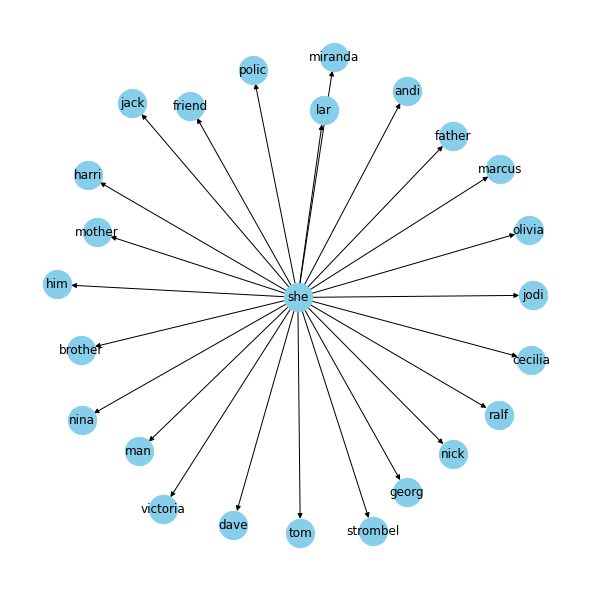

In [124]:
plot_graph(nx_SG_d1)

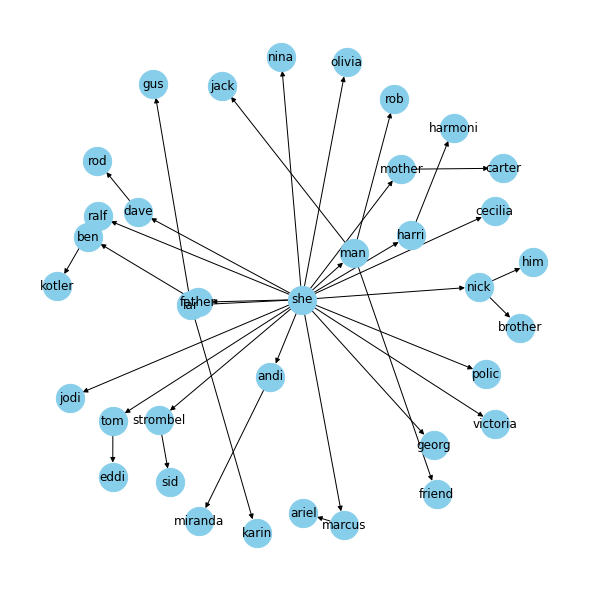

In [125]:
plot_graph(nx_SG_d2)